In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot

In [3]:
%matplotlib inline

In [4]:
import scipy.special

In [5]:
class NeuralNetwork:
    
    """Simple but powerful neural network"""
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        """Initilizes the neural network"""
        self.inodes= inputnodes
        self.hnodes= hiddennodes
        self.onodes= outputnodes
        """initialize weights"""
#         self.wih= (np.random.rand(self.hnodes, self.inodes) -0.5)
#         self.who= (np.random.rand(self.onodes, self.hnodes) -0.5)
        self.wih = np.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))
    
        self.lr = learningrate    
        self.activation_function = lambda x: scipy.special.expit(x)      
        pass
    
    def train(self, input_list, target_list):
        """Tranins the data and updates the weights"""
        inputs = np.array(input_list, ndmin= 2).T
        targets = np.array(target_list, ndmin= 2).T
        
        hidden_input = np.dot(self.wih, inputs)
        hidden_output = self.activation_function(hidden_input)
        
        final_input = np.dot(self.who, hidden_output)
        final_output = self.activation_function(final_input)
        
        output_errors = targets - final_output
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * final_output * 
                                     (1.0 - final_output)), np.transpose(hidden_output))        
        self.wih += self.lr * np.dot((hidden_errors * hidden_output *
                                    (1.0 - hidden_output)), np.transpose(inputs))
        pass
    
    def query(self, input_list):
        """Gets an inputs and returns an output from the output nodes"""
        inputs = np.array(input_list,ndmin=2).T
        
        hidden_input = np.dot(self.wih, inputs)
        hidden_output = self.activation_function(hidden_input)
        final_input = np.dot(self.who, hidden_output)
        final_output = self.activation_function(final_input)
        return final_output
    

In [6]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

In [7]:
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [8]:
training_data_file = open('mnist_dataset/mnist_train_100.csv','r')

In [9]:
training_data_list = training_data_file.readlines()

In [10]:
training_data_file.close()

In [11]:
for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    target = np.zeros(output_nodes) + 0.0
    target[int(all_values[0])] =  0.99 #experiment: set int(record[0]) i think it gotta be firt letter of string
    n.train(inputs, target)
    pass

In [12]:
test_data_file = open('mnist_dataset/mnist_test_10.csv', 'r')

In [13]:
test_data_list = test_data_file.readlines()

In [14]:
test_data_file.close()

0


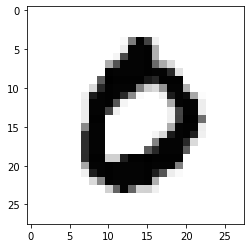

In [28]:
all_values = test_data_list[3].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap= 'Greys', interpolation= None)
print(all_values[0])

In [16]:
scorecard = []

In [17]:
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print('correct label: ', correct_label)
    inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print('label: ', label)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    

correct label:  7
label:  7
correct label:  2
label:  0
correct label:  1
label:  1
correct label:  0
label:  0
correct label:  4
label:  4
correct label:  1
label:  1
correct label:  4
label:  4
correct label:  9
label:  3
correct label:  5
label:  4
correct label:  9
label:  7


In [20]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [21]:
score_array = np.array(scorecard)

In [26]:
print(f'{int(score_array.sum() / len(score_array) * 100)}% accuracy')

60% accuracy
